In [52]:
from main import *
import pandas as pd
from matplotlib import pyplot as plt

data = Data("data", "london")

In [53]:
# get station with highest total_lines
data.stations
# get the 5 rows from the dataframe where total_lines is highest
print("Stations with most lines")
data.stations.nlargest(8, "total_lines")


Stations with most lines


,latitude,longitude,name,display_name,zone,total_lines,rail
id,,,,,,,
145,51.5308,-0.1238,King's Cross St. Pancras,King's Cross<br />St. Pancras,1.0,6,1
11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0
13,51.5133,-0.0886,Bank,NaN,1.0,4,0
87,51.5074,-0.1223,Embankment,NaN,1.0,4,0
156,51.5178,-0.0823,Liverpool Street,Liverpool<br />Street,1.0,4,1
167,51.5186,-0.0886,Moorgate,NaN,1.0,4,1
193,51.5154,-0.1755,Paddington,NaN,1.0,4,1
279,51.5036,-0.1143,Waterloo,NaN,1.0,4,1


Stations in each zone


<Axes: xlabel='zone'>

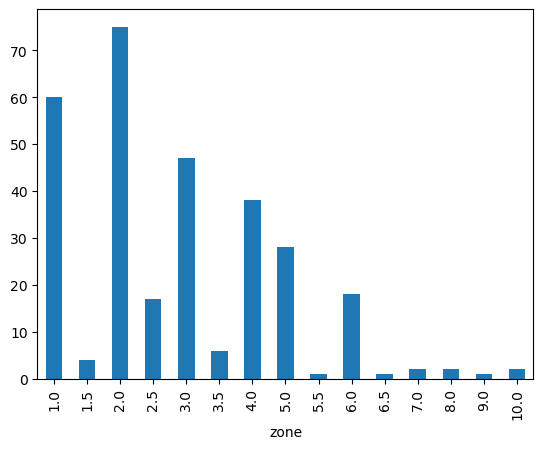

In [54]:
print("Stations in each zone")
data.stations.groupby("zone").size().plot(kind="bar")

Mapping basics

(492782.46525832143, 565250.7111781755, 153561.8369332109, 203919.02440256177)

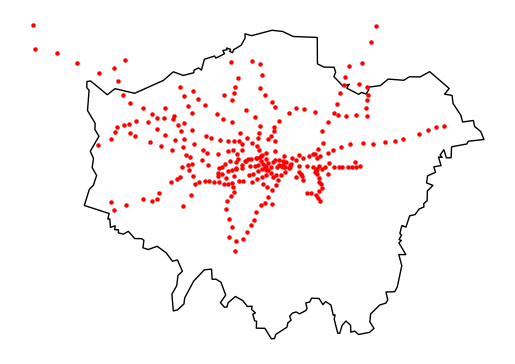

In [59]:
from shapely.geometry import Point
import geopandas

london = geopandas.read_file(os.path.join("mapping", "london_outline_simple.shp"))



# Assuming data.stations is a DataFrame with 'latitude' and 'longitude' columns
geometry = [Point(xy) for xy in zip(data.stations.longitude, data.stations.latitude)]
stations_gdf = geopandas.GeoDataFrame(data.stations, geometry=geometry, crs="EPSG:4326")  # WGS84 latitude-longitude projection

# Convert stations to same CRS as map
stations_gdf = stations_gdf.to_crs(london.crs)

# Now plot the stations on the map
base = london.plot(color='white', edgecolor='black')
stations_gdf.plot(ax=base, marker='o', color='red', markersize=5)
# no axis
plt.axis('off')